# Employee performance analysis with `Python`: anomaly detection

```
@author: Aleksandras Urbonas
@date  : 20241211T2243 ALUR
```


---

# 0. Config



In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# set chart size
sns.set_theme(rc={'figure.figsize':(3,3)})



---

# 1. Import data



In [13]:
raw_data_file_path = 'data/data_model.csv'

# Load the data
data_model = pd.read_csv(raw_data_file_path)



In [14]:
# Display the first few rows to understand the structure
print(data_model.head(2), end='\n\n\n')

# Check the columns and data types
print(data_model.info(), end='\n\n\n')

# Check for any missing values
print(data_model.isnull().sum()) 



   employee_id job_level job_function region   age  is_promo  is_men  \
0            1        T7          G&A    US2  28.7         0       0   
1            2        T7  Engineering    US1  33.6         0       1   

   perf_rank  tenure  
0          3     4.6  
1          3     1.1  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4217 entries, 0 to 4216
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   employee_id   4217 non-null   int64  
 1   job_level     4217 non-null   object 
 2   job_function  4217 non-null   object 
 3   region        4217 non-null   object 
 4   age           4217 non-null   float64
 5   is_promo      4217 non-null   int64  
 6   is_men        4217 non-null   int64  
 7   perf_rank     4217 non-null   int64  
 8   tenure        4217 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 296.6+ KB
None


employee_id     0
job_level       0
job_function    0
region  

---

# Data anomalies



In [11]:
# Fit the model
from sklearn.ensemble import IsolationForest

clf = IsolationForest(
    n_estimators=800
    , n_jobs=50
    , contamination=0.05

)

clf.fit(data_model)



ValueError: could not convert string to float: 'T7'

In [23]:
X_test.head(2)



,employee_id,age,is_men,tenure,region_US2,region_US3,region_US4,job_level_I5,job_level_I6,job_level_I7,...,job_level_T7,job_level_T8,job_level_T9,job_function_Engineering,job_function_G&A,job_function_Product,job_function_S&O,job_function_Sales,perf_rank_4,perf_rank_5
3655,6969,29.8,1,3.6,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
607,1184,27.1,1,2.5,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [24]:
predictions = clf.predict(X_test)
print(predictions[:10])



[1 1 1 1 1 1 1 1 1 1]


In [25]:
predictions.shape



(208,)

In [26]:
type(predictions)



numpy.ndarray

In [27]:
X_test.shape



(208, 21)

In [28]:
# Identify anomalies
import numpy as np

anomalies = np.where(predictions == -1)[0]
anomalous_data = X_test[anomalies]



KeyError: "None of [Int64Index([26, 35, 59, 72, 73, 112, 124, 176, 184], dtype='int64')] are in the [columns]"

In [29]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



## Build and Train the Model:

    We'll use a Random Forest Classifier for this example.
    
    Class imbalance: we also adjust the weights of classes so that the model pays more attention to the minority class (promoted).


In [30]:
# Initialize the model
model = RandomForestClassifier(
    n_estimators=800
    , class_weight='balanced'
    , random_state=8
)



In [31]:
# Train the model
model.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', n_estimators=800,
                       random_state=8)

## Evaluate the Model:

In [32]:
# Make predictions
y_pred = model.predict(X_test)



In [33]:
# Evaluate the performance
print("Accuracy:\n", accuracy_score(y_test, y_pred), end="\n-----------------------\n\n")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred), end="\n-----------------------\n\n")

print("Classification Report:\n", classification_report(y_test, y_pred), end="\n-----------------------\n\n")



Accuracy:
 0.5865384615384616
-----------------------

Confusion Matrix:
 [[50 56]
 [30 72]]
-----------------------

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.47      0.54       106
           1       0.56      0.71      0.63       102

    accuracy                           0.59       208
   macro avg       0.59      0.59      0.58       208
weighted avg       0.59      0.59      0.58       208

-----------------------



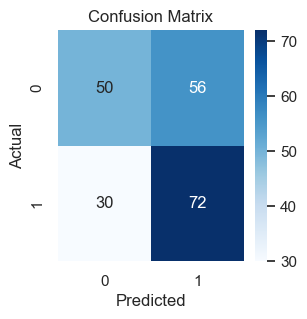

In [34]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



## Explanation:

Data Preprocessing:

    Handling missing values, encoding categorical variables, and scaling numerical features are crucial steps in preparing data for modeling.

Model Selection:

    A Random Forest Classifier is chosen for its robustness and ability to handle complex data structures.

Evaluation:

    Accuracy, classification report, and confusion matrix provide insights into the model's performance.


# Insights:
    
    After running the above steps, we also now have a predictive model that can determine if an employee is likely to be promoted based on the features provided.
    The classification report and confusion matrix help us understand the model's performance and areas for improvement.

    We can tweak the model parameters or try different algorithms to see which one performs best on your dataset.

